10 Вариант

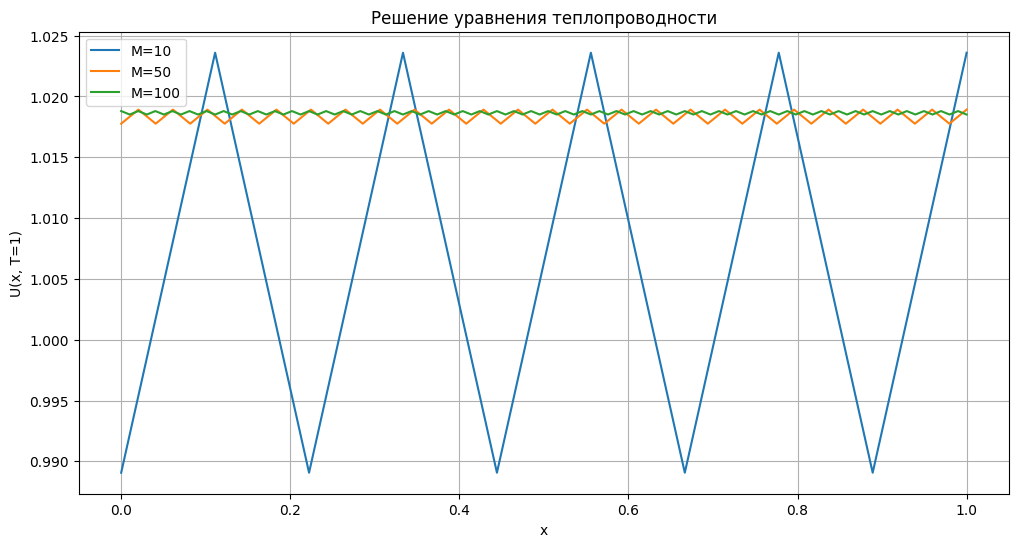

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initial_condition(x):
    return (1.3 * x**2 + 1.2) * np.sin(np.pi * x)

def solve_heat_equation(M_values, T=1.0):
    results = []
    for M in M_values:
        h = 1.0 / (M - 1)
        tau = h**2 / 8  # Условие устойчивости для диффузии
        N = int(T / tau) + 1

        x = np.linspace(0, 1, M)
        U = initial_condition(x)

        for _ in range(N):
            U_new = U.copy()
            for i in range(M):
                if i == 0:
                    # Граница слева (∂U/∂x=0)
                    U_new[i] = U[i] + tau * (4 * (2 * (U[i+1] - U[i])) / h**2)
                elif i == M-1:
                    # Граница справа (∂U/∂x=0)
                    U_new[i] = U[i] + tau * (4 * (2 * (U[i-1] - U[i])) / h**2)
                else:
                    # Внутренние точки
                    diff_term = 4 * (U[i+1] - 2*U[i] + U[i-1]) / h**2
                    conv_term = (U[i+1] - U[i-1]) / (2*h)
                    U_new[i] = U[i] + tau * (diff_term + conv_term)
            U = U_new
        results.append((x, U, M))
    return results

# Параметры сеток
M_values = [10, 50, 100]
solutions = solve_heat_equation(M_values)

# Построение графиков
plt.figure(figsize=(12, 6))
for x, U, M in solutions:
    plt.plot(x, U, label=f'M={M}')
plt.xlabel('x')
plt.ylabel('U(x, T=1)')
plt.title('Решение уравнения теплопроводности')
plt.legend()
plt.grid(True)
plt.show()